# Simulación de partícula Libre


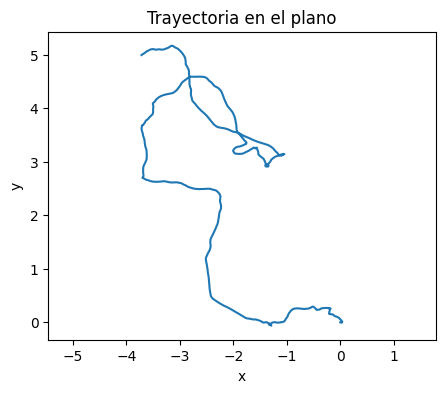

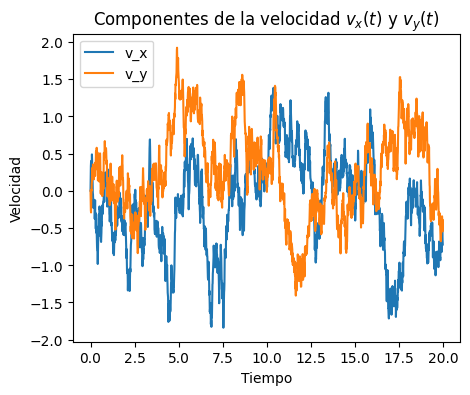

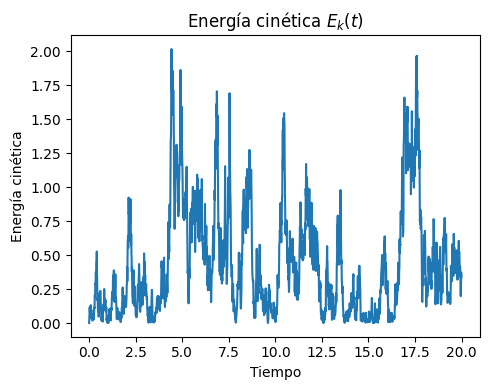

Energía cinética promedio: 0.4361278960880974


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros físicos
m = 1.0         # masa
gamma = 1     # coeficiente de fricción
g = 1.0         # amplitud del ruido
dt = 0.01       # paso de tiempo
T = 20          # tiempo total
t = np.arange(0, T, dt)
N = len(t)

# Constantes derivadas del integrador GJF
a = (1 - gamma * dt / (2 * m)) / (1 + gamma * dt / (2 * m))
b = 1 / (1 + gamma * dt / (2 * m))

# Inicialización de arrays
x = np.zeros(N)
y = np.zeros(N)
vx = np.zeros(N)
vy = np.zeros(N)
Ek = np.zeros(N)
Fx = np.zeros(N)
Fy = np.zeros(N)

# Condiciones iniciales
x[0], y[0] = 0.0, 0.0
vx[0], vy[0] = 0.0, 0.0  # velocidad inicial arbitraria

# Fuerza externa (aquí nula, pero puede depender de x o t)
def F(t):
    return np.array([0.0, 0.0])

# Simulación (integrador de Grønbech-Jensen & Farago)
for i in range(N - 1):
    # Fuerza actual
    Fx[i], Fy[i] = F(t[i])

    # Incrementos de Wiener
    dWx, dWy = np.random.normal(0, np.sqrt(dt), 2)

    # Actualización de posición
    x[i+1] = x[i] + dt * b * vx[i] + (b * dt**2 / (2 * m)) * Fx[i] + (b * dt / (2 * m)) * g * dWx
    y[i+1] = y[i] + dt * b * vy[i] + (b * dt**2 / (2 * m)) * Fy[i] + (b * dt / (2 * m)) * g * dWy

    # Nueva fuerza (en t + dt)
    Fx[i+1], Fy[i+1] = F(t[i+1])

    # Actualización de velocidad
    vx[i+1] = a * vx[i] + (dt / (2 * m)) * (a * Fx[i] + Fx[i+1]) + (b / m) * g * dWx
    vy[i+1] = a * vy[i] + (dt / (2 * m)) * (a * Fy[i] + Fy[i+1]) + (b / m) * g * dWy

    # Energía cinética
    Ek[i+1] = 0.5 * m * (vx[i+1]**2 + vy[i+1]**2)

# === Gráficas ===
plt.figure(figsize=(5, 4))

# Trayectoria
#plt.subplot(1, 3, 1)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trayectoria en el plano')
plt.axis('equal')
plt.show()

# Componentes de la velocidad
#plt.subplot(1, 3, 2)
plt.figure(figsize=(5, 4))
plt.plot(t, vx, label='v_x')
plt.plot(t, vy, label='v_y')
plt.xlabel('Tiempo')
plt.ylabel('Velocidad')
plt.title('Componentes de la velocidad $v_x (t)$ y $v_y (t)$')
plt.legend()
plt.show()

# Energía cinética
#plt.subplot(1, 3, 3)
plt.figure(figsize=(5, 4))
plt.plot(t, Ek)
plt.xlabel('Tiempo')
plt.ylabel('Energía cinética')
plt.title('Energía cinética $E_k (t)$')
plt.tight_layout()
plt.show()

print("Energía cinética promedio:", np.mean(Ek))


**Desplazamiento Cuadrático Medio**

Corriendo 100 simulaciones para promediar el MSD...
Cálculo del MSD completado.


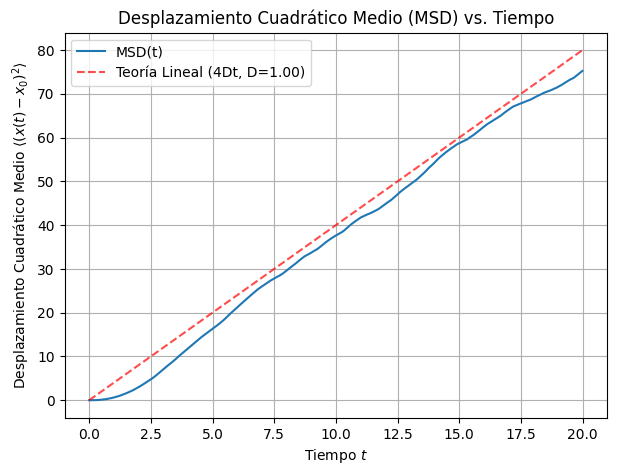


--- Análisis del MSD ---
Pendiente del MSD (Régimen Difusivo): m_ajuste = 4.0857
La relación teórica de la pendiente es 4 * D, donde D = k_B * T / gamma.
Pendiente teórica (4 * D): 4.0000
Relacionando con la Temperatura:
k_B * T (Experimental) = (Pendiente * gamma) / 4 = 1.0214
k_B * T (Teórico): 1.0000


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# --- PARÁMETROS FÍSICOS Y TEMPORALES ---
m = 1.0       # masa
gamma = 1.0   # coeficiente de fricción
kB_T = 1.0    # Constante de Boltzmann * Temperatura (usado como 1.0 por conveniencia)

# El parámetro g (amplitud del ruido) se relaciona con kB_T y gamma por la Relación
# de fluctuación-disipación: g^2 = 2 * gamma * m * kB_T
g = np.sqrt(2 * gamma * m * kB_T)

dt = 0.01     # paso de tiempo
T = 20        # tiempo total
t = np.arange(0, T, dt)
N = len(t)

# Constantes derivadas del integrador GJF
a = (1 - gamma * dt / (2 * m)) / (1 + gamma * dt / (2 * m))
b = 1 / (1 + gamma * dt / (2 * m))

# --- PARÁMETROS PARA EL CÁLCULO DEL MSD ---
N_TRAJECTORIES = 100  # Número de simulaciones a promediar

# Fuerza externa (aquí nula)
def F(t):
    return np.array([0.0, 0.0])

def run_single_trajectory(N, dt, F, x0=(0.0, 0.0), v0=(0.0, 0.0)):
    """Ejecuta una única simulación de dinámica de Langevin (GJF)."""
    # Inicialización de arrays
    x = np.zeros(N)
    y = np.zeros(N)
    vx = np.zeros(N)
    vy = np.zeros(N)

    # Condiciones iniciales
    x[0], y[0] = x0
    vx[0], vy[0] = v0

    Fx = np.zeros(N)
    Fy = np.zeros(N)

    # Simulación (integrador de Grønbech-Jensen & Farago)
    for i in range(N - 1):
        Fx[i], Fy[i] = F(t[i])
        dWx, dWy = np.random.normal(0, np.sqrt(dt), 2)

        # Actualización de posición
        x[i+1] = x[i] + dt * b * vx[i] + (b * dt**2 / (2 * m)) * Fx[i] + (b * dt / (2 * m)) * g * dWx
        y[i+1] = y[i] + dt * b * vy[i] + (b * dt**2 / (2 * m)) * Fy[i] + (b * dt / (2 * m)) * g * dWy

        Fx[i+1], Fy[i+1] = F(t[i+1])

        # Actualización de velocidad
        vx[i+1] = a * vx[i] + (dt / (2 * m)) * (a * Fx[i] + Fx[i+1]) + (b / m) * g * dWx
        vy[i+1] = a * vy[i] + (dt / (2 * m)) * (a * Fy[i] + Fy[i+1]) + (b / m) * g * dWy

    return x, y

# --- CÁLCULO DEL MSD ---

# Array para almacenar los Desplazamientos Cuadráticos (DC) de cada simulación
# DC(t) = (x(t) - x_0)^2 + (y(t) - y_0)^2
all_squared_displacements = np.zeros((N_TRAJECTORIES, N))

initial_x, initial_y = x[0], y[0]

print(f"Corriendo {N_TRAJECTORIES} simulaciones para promediar el MSD...")

for k in range(N_TRAJECTORIES):
    x_traj, y_traj = run_single_trajectory(N, dt, F, x0=(initial_x, initial_y), v0=(0.0, 0.0))

    # El desplazamiento inicial (x_0, y_0) es (0, 0) según las condiciones iniciales
    # MSD(t) = < (x(t) - x(0))^2 + (y(t) - y(0))^2 >
    squared_displacement = (x_traj - initial_x)**2 + (y_traj - initial_y)**2
    all_squared_displacements[k, :] = squared_displacement

# Promediar los desplazamientos cuadráticos para obtener el MSD(t)
MSD = np.mean(all_squared_displacements, axis=0)

print("Cálculo del MSD completado.")

# --- GRÁFICA DEL MSD (Punto 3 de la tarea) ---

plt.figure(figsize=(7, 5))
plt.plot(t, MSD, label='MSD(t)')
plt.xlabel('Tiempo $t$')
plt.ylabel('Desplazamiento Cuadrático Medio $\\langle (x(t) - x_0)^2 \\rangle$')
plt.title('Desplazamiento Cuadrático Medio (MSD) vs. Tiempo')

# Para encontrar la pendiente, graficamos una línea recta de referencia.
# Para el Movimiento Browniano: MSD(t) = 4 * D * t
# En 2D, D = k_B * T / (m * gamma)
Diffusion_Coefficient = kB_T / gamma # Asumiendo m=1
Theory_Line = 4 * Diffusion_Coefficient * t

plt.plot(t, Theory_Line, 'r--', label=f'Teoría Lineal (4Dt, D={Diffusion_Coefficient:.2f})', alpha=0.7)
plt.legend()
plt.grid(True)
plt.show()

# --- CÁLCULO DE LA PENDIENTE Y RELACIÓN CON LA TEMPERATURA ---
# La pendiente es la de la parte lineal (régimen difusivo)
# Para el MSD en 2D, la relación es: Pendiente = 4 * D = 4 * (k_B * T / gamma)

# Ajustamos solo la parte lineal (por ejemplo, después de t=1.0)
linear_range_start = int(1.0 / dt)
slope, intercept = np.polyfit(t[linear_range_start:], MSD[linear_range_start:], 1)

print("\n--- Análisis del MSD ---")
print(f"Pendiente del MSD (Régimen Difusivo): m_ajuste = {slope:.4f}")
print(f"La relación teórica de la pendiente es 4 * D, donde D = k_B * T / gamma.")
print(f"Pendiente teórica (4 * D): {4 * Diffusion_Coefficient:.4f}")
print(f"Relacionando con la Temperatura:")
print(f"k_B * T (Experimental) = (Pendiente * gamma) / 4 = {(slope * gamma) / 4:.4f}")
print(f"k_B * T (Teórico): {kB_T:.4f}")

# --- Gráficas Originales (usando la última trayectoria simulada) ---
# ... (Tu código de gráficas originales aquí, adaptado si es necesario)

# Simulación Colección de Partículas

Trayectorias de 100 partículas con fronteras periódicas

Partículas interactuando con un potencial de Leonnard Jones

/tmp/ipython-input-3807459776.py:183: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


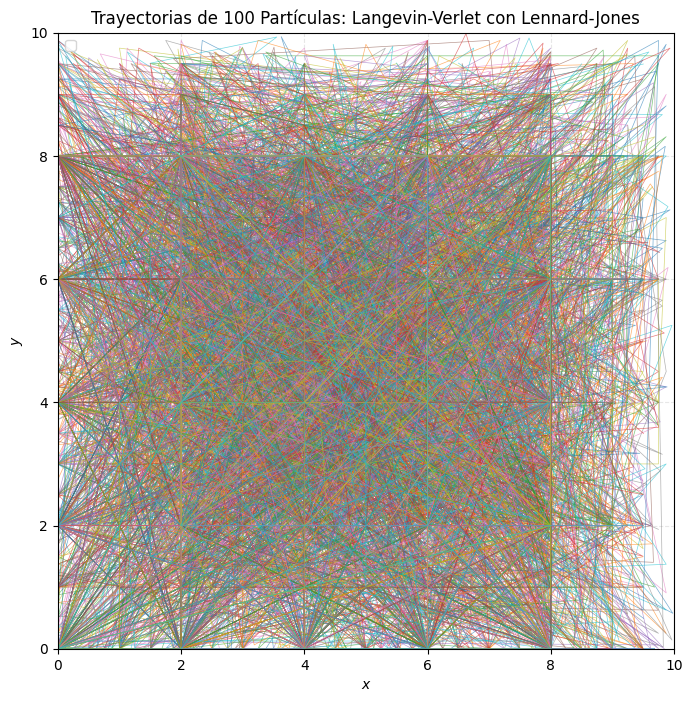

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

# --- Parámetros de la Simulación ---
N = 100             # Número de partículas
T = 1.0             # Temperatura (k_B=1)
gamma = 0.5         # Coeficiente de fricción
m = 1.0             # Masa de las partículas
dt = 0.01           # Paso de tiempo
L = 10.0            # Longitud de la caja de simulación (L x L)
n_steps = 5000      # Número total de pasos
sampling_rate = 50  # Muestrear cada 50 pasos

# Parámetros del Potencial de Lennard-Jones (LJ)
epsilon = 1.0
sigma = 1.0
r_cut = 3.0 * sigma # Distancia de corte

# --- Constantes para el Integrador Langevin-Verlet ---
# g = sqrt(2 * gamma * k_B * T)
g = np.sqrt(2.0 * gamma * T)
# Coeficientes 'a' y 'b' de las ecuaciones de la imagen
a = (1.0 - (gamma * dt) / (2.0 * m)) / (1.0 + (gamma * dt) / (2.0 * m))
b = (1.0 / (1.0 + (gamma * dt) / (2.0 * m))) * (g * dt / m)

# -------------------------------------------------------------------
# --- Funciones Esenciales Optimizadas con Numba (JIT) ---
# -------------------------------------------------------------------

@njit(fastmath=True)
def enforce_pbc(pos, box_length):
    """Aplica condiciones de frontera periódicas (PBC)"""
    return np.remainder(pos, box_length)

@njit(fastmath=True)
def minimum_image_distance(dr, box_length):
    """Calcula el vector de distancia mínima (MIC)"""
    half_L = box_length / 2.0
    # Vectorización manual para Numba
    for i in range(dr.shape[0]):
        if dr[i] > half_L:
            dr[i] -= box_length
        elif dr[i] < -half_L:
            dr[i] += box_length
    return dr

@njit(fastmath=True)
def compute_force_lj_optimized(x, L, N, m, epsilon, sigma, r_cut):
    """Calcula la aceleración de LJ con PBC y seguridad anti-división por cero."""
    F = np.zeros_like(x)
    r_cut_sq = r_cut**2
    sigma6 = sigma**6
    # CONSTANTE DE SEGURIDAD: Mínima distancia al cuadrado permitida
    R_SQ_MIN = 1e-12

    for i in range(N):
        for j in range(i + 1, N):
            dr = x[i, :] - x[j, :]

            # Aplicar MIC
            dr_mic = minimum_image_distance(dr.copy(), L)

            # Magnitud de la distancia al cuadrado
            r_sq = dr_mic[0]**2 + dr_mic[1]**2

            # **CORRECCIÓN DE SEGURIDAD**
            if r_sq < R_SQ_MIN:
                continue # Evita la división por cero si las partículas se superponen
            # --------------------------

            if r_sq < r_cut_sq:
                r_inv_sq = 1.0 / r_sq
                r6_inv = sigma6 * (r_inv_sq**3)

                # Factor de la fuerza de LJ
                F_scalar = 4.0 * epsilon * (12.0 * r6_inv**2 * r_inv_sq - 6.0 * r6_inv * r_inv_sq)

                # Vector de Fuerza: F = F_scalar * dr_mic
                F_vec = F_scalar * dr_mic

                F[i, :] += F_vec
                F[j, :] -= F_vec

    return F / m # Devolver la aceleración (F/m)

@njit(fastmath=True)
def run_simulation(x, v, F_old, N, L, m, dt, a, b, g, epsilon, sigma, r_cut, n_steps, sampling_rate):
    """Bucle de integración Langevin-Verlet optimizado"""

    # Inicialización del array de trayectoria
    num_samples = n_steps // sampling_rate + 1
    trajectory = np.zeros((num_samples, N, 2))
    trajectory[0, :, :] = x.copy()
    sample_index = 1

    for step in range(n_steps):

        # 1. Término estocástico (incremento aleatorio: dW)
        dW = np.random.randn(N, 2)

        # 2. Actualización de la posición: x(t+dt)
        # x(t+dt) = x(t) + dt*v(t) + (b*dt^2 / 2) * F(t)/m + (b*g*dt / m) * dW(t)
        x_new = x + dt * v + (b * dt**2 / 2.0) * F_old + (b * g * dt / m) * dW

        # 3. Aplicar Fronteras Periódicas
        x_new = enforce_pbc(x_new, L)

        # 4. Calcular la nueva aceleración (F(t+dt)/m)
        F_new = compute_force_lj_optimized(x_new, L, N, m, epsilon, sigma, r_cut)

        # 5. Actualización de la velocidad: v(t+dt)
        # v(t+dt) = a*v(t) + (dt / 2) * (a*F(t)/m + F(t+dt)/m) + (b*g / m) * dW(t)
        v_new = a * v + (dt / 2.0) * (a * F_old + F_new) + (b * g / m) * dW

        # 6. Actualizar las variables del sistema
        x = x_new
        v = v_new
        F_old = F_new

        # Almacenar la trayectoria
        if (step + 1) % sampling_rate == 0:
            # Solo copiamos el valor si estamos en un índice válido
            if sample_index < num_samples:
                trajectory[sample_index, :, :] = x.copy()
                sample_index += 1

    return trajectory

# -------------------------------------------------------------------
# --- Inicialización del Sistema (Corregida con Perturbación) ---
# -------------------------------------------------------------------

# Posiciones iniciales (rejilla cúbica simple)
n_box = int(np.ceil(N**(1/2)))
spacing = L / n_box
x = np.zeros((N, 2))
k = 0
for i in range(n_box):
    for j in range(n_box):
        if k < N:
            x[k, 0] = (i + 0.5) * spacing
            x[k, 1] = (j + 0.5) * spacing
            k += 1

# Velocidades iniciales (Maxwell-Boltzmann)
v = np.random.normal(0, np.sqrt(T / m), (N, 2))
v -= np.mean(v, axis=0) # Centro de masa cero

# **SOLUCIÓN AL ZeroDivisionError**: Perturbación aleatoria
# Esto separa las partículas ligeramente para evitar r=0
x += np.random.uniform(-1.0, 1.0, size=(N, 2)) * (1e-3 * L)
x = enforce_pbc(x, L)

# Aceleración inicial (a(t) = F(t)/m)
F_old = compute_force_lj_optimized(x, L, N, m, epsilon, sigma, r_cut)

# --- Ejecución de la Simulación ---
# Se usan copias de los arrays para asegurar que run_simulation puede operar sin side effects
trajectory = run_simulation(x.copy(), v.copy(), F_old.copy(), N, L, m, dt, a, b, g, epsilon, sigma, r_cut, n_steps, sampling_rate)

# -------------------------------------------------------------------
# --- Graficación de Trayectorias ---
# -------------------------------------------------------------------

plt.figure(figsize=(8, 8))
#plt.scatter(trajectory[0, :, 0], trajectory[0, :, 1], color='red', s=20, label='Posición Inicial', zorder=5)

# Graficar la trayectoria de cada partícula
for i in range(N):
    plt.plot(trajectory[:, i, 0], trajectory[:, i, 1], lw=0.5, alpha=0.6)

# Posiciones finales
#plt.scatter(trajectory[-1, :, 0], trajectory[-1, :, 1], color='blue', s=20, label='Posición Final', zorder=5)

# Configuración de la gráfica
plt.xlim(0, L)
plt.ylim(0, L)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(f'Trayectorias de {N} Partículas: Langevin-Verlet con Lennard-Jones')
plt.legend()
plt.grid(True, ls='--', alpha=0.3)
plt.show()